<a href="https://colab.research.google.com/github/RenanCostaNascimento/mestrado-reconhecimento-padroes/blob/main/Resolvendo_um_problema_de_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos começar importando os dados de amostra do Colab. É um dataset com preços de casas na Califórnia.


In [47]:
import pandas as pd

dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')
dataset.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


Os dados da base de dados devem ser pré-processados. Para tanto, vamos começar separando os dados em uma matriz de features (dados de entrada) e um vetor coluna com as classes (última coluna – “media_house_values” – do arquivo csv).

In [48]:
import numpy as np

# transforma o dataset do pandas em np array
featureMatrix = dataset.to_numpy()

# extrai a ultima coluna da matrix
pricesVector = featureMatrix[:,len(featureMatrix[0]) - 1]

# remove a ultima coluna da featureMatrix
featureMatrix = np.delete(featureMatrix, len(featureMatrix[0]) - 1, 1)

Agora vamos treinar um modelo da classe LinearRegression do scikit-learn com toda a base.

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(featureMatrix, pricesVector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Com isso conseguimos calcular o MSE (erro quadrático médio) para o modelo treinado;

In [50]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(featureMatrix)
mse = mean_squared_error(pricesVector, prediction)
print("MSE: ", mse)
print("Intercept:", model.intercept_)

MSE:  4824523173.926901
Intercept: -3620600.8929739078


Por fim, vamos plotar em um gráfico (2D) do MSE em função do atributo intercept_ da classe LinearRegression. Para tanto, vamos manter os valores do atributo coef_ fixos e variar o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

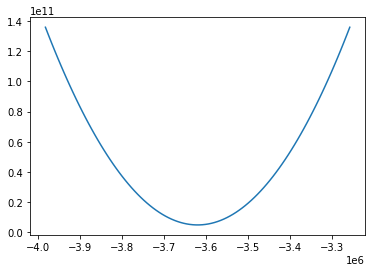

In [51]:
import matplotlib.pyplot as plt

delta = model.intercept_ * 0.1
w0 = np.linspace(model.intercept_ - delta, model.intercept_ + delta, 100)

def generateErrors(model, intercepts):
  errors = []
  for intercept in intercepts:
    model.intercept_ = intercept
    innerPrediction = model.predict(featureMatrix)
    innerMse = mean_squared_error(pricesVector, innerPrediction)
    errors.append(innerMse)
  return errors

errors = generateErrors(model, w0)

plt.ylabel = "Error"
plt.xLabel = "W0"
plt.plot(w0, errors)
plt.show()